In [11]:
import pandas as pd
import numpy as nm

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [13]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)/ 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)/ 255.0

In [14]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape= (28, 28, 1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

                              

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, epochs = 10, batch_size = 64, validation_data = (test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7239 - loss: 0.7500 - val_accuracy: 0.8545 - val_loss: 0.3942
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8697 - loss: 0.3557 - val_accuracy: 0.8775 - val_loss: 0.3329
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8918 - loss: 0.3017 - val_accuracy: 0.8956 - val_loss: 0.2905
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9031 - loss: 0.2610 - val_accuracy: 0.8997 - val_loss: 0.2835
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9134 - loss: 0.2335 - val_accuracy: 0.9046 - val_loss: 0.2655
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9216 - loss: 0.2131 - val_accuracy: 0.9036 - val_loss: 0.2650
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9277 - loss: 0.1946 - val_accuracy: 0.9069 - val_loss: 0.2668
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9333 - loss: 0.1805 - val_accuracy: 0.

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9095 - loss: 0.2766
Test accuracy: 0.9118000268936157


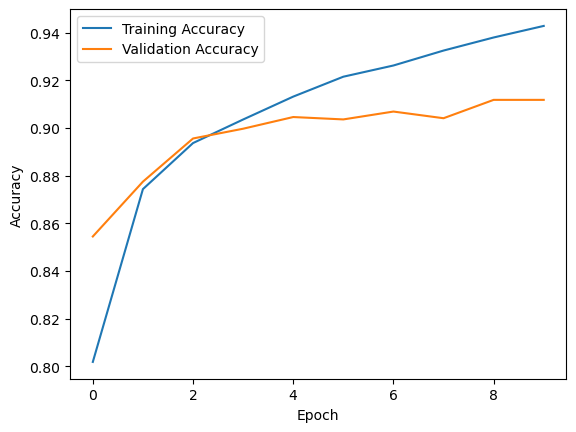

In [20]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [25]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker',   'bag', 'ankle_boots']


In [26]:
predictions = model.predict(test_images[:1])
label = labels[nm.argmax(predictions)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


ankle_boots


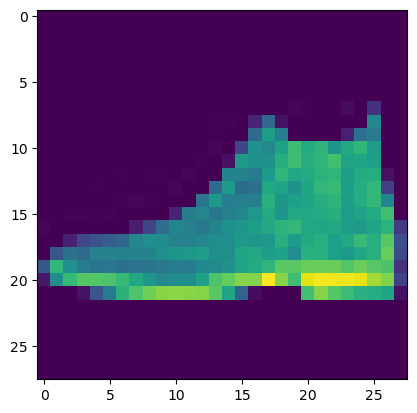

In [28]:
print(label)
plt.imshow(test_images[:1][0])
plt.show()